In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [489]:
df_airbnb=pd.read_csv("/content/drive/MyDrive/AB_NYC_2019.csv")
df_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [490]:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [491]:
df_airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [492]:
df_airbnb['price']=df_airbnb['price'].astype('float64')

In [493]:
df_airbnb.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room   70.0               2                  0   
48891  -73.93317     Private room   40.0               4                  0   
48892  -73.94867  Entire home/apt  115.0              10                  0   
48893  -73.99112      Shared room   55.0               1                  0   
48894  -73.98933     Private room   90.0               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [494]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [495]:
df_airbnb['price'].dtype

dtype('float64')

In [496]:
object_columns=df_airbnb.select_dtypes("object").columns
object_columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [497]:
for column in object_columns:
  df_airbnb[column]=df_airbnb[column].astype("category")

In [498]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  category
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  category
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  float64 
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

In [499]:
df_airbnb.fillna(0,axis=1,inplace=True)

In [500]:
df_airbnb[df_airbnb["last_review"]=='NaN']

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [501]:
df_airbnb.describe().T

count   unique              top     freq
id                                48895    48895             2539        1
name                              48895    47906   Hillside Hotel       18
host_id                           48895    37457        219517861      327
host_name                         48895    11453          Michael      417
neighbourhood_group               48895        5        Manhattan    21661
neighbourhood                     48895      221     Williamsburg     3920
latitude                        48895.0  19048.0         40.71813     18.0
longitude                       48895.0  14718.0        -73.95677     18.0
room_type                         48895        3  Entire home/apt    25409
price                           48895.0    674.0            100.0   2051.0
minimum_nights                    48895      109                1    12720
number_of_reviews                 48895      394                0    10052
last_review                       48895     1765                0    10052
reviews_per_month               48895.0    938.0              0.0  10052.0
calculated_host_listings_count    48895       47                1    32303
availability_365                  48895      366                0    17533

In [502]:
columns=["price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]
for col in columns:
  max=(3*df_airbnb[col].std())+df_airbnb[col].mean()
  min=-(3*df_airbnb[col].std())+df_airbnb[col].mean()
  mean= df_airbnb.loc[(df_airbnb[col]>min) & (df_airbnb[col]<max),col].mean()

  if mean is not np.nan:
   df_airbnb.loc[(df_airbnb[col]>min)]
   df_airbnb[col].fillna(mean,inplace=True)
  else:
    df_airbnb[col].fillna(df_airbnb[col].mean(),inplace=True)

  df_airbnb[col]=df_airbnb[col].astype('int64')


In [503]:
df_airbnb.max()

<ipython-input-503-f13c43aac0f0>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.max()


id                                     36487245
host_id                               274321313
neighbourhood_group               Staten Island
neighbourhood                          Woodside
latitude                               40.91306
longitude                             -73.71299
room_type                           Shared room
price                                     10000
minimum_nights                             1250
number_of_reviews                           629
reviews_per_month                          58.5
calculated_host_listings_count              327
availability_365                            365
dtype: object

In [504]:
df_airbnb.min()

<ipython-input-504-405685a988b1>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.min()


id                                           2539
host_id                                      2438
neighbourhood_group                         Bronx
neighbourhood                            Allerton
latitude                                 40.49979
longitude                               -74.24442
room_type                         Entire home/apt
price                                           0
minimum_nights                                  1
number_of_reviews                               0
reviews_per_month                               0
calculated_host_listings_count                  1
availability_365                                0
dtype: object

In [505]:
df_airbnb.mean()

<ipython-input-505-597c84874b18>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.mean()


id                                1.901714e+07
host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.527207e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.090910e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

In [506]:
sort=df_airbnb.sort_values(ascending=False,by='price')
sort

id                                               name    host_id  \
9151    7003697                Furnished room in Astoria apartment   20582832   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238  22436899                                1-BR Lincoln Center   72390391   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
...         ...                                                ...        ...   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   

      host_name neighbourhood_group       neighbourhood  latitude longitude  \
9151   Kathrine              Queens             Astoria   40.7681 -73.91651   
17692      Erin            Brooklyn          Greenpoint   40.7326 -73.95739   
29238    Jelena           Manhattan     Upper West Side  40.77213 -73.98665   
40433      Matt           Manhattan     Lower East Side   40.7198 -73.98566   
12342       Amy           Manhattan     Lower East Side  40.71355 -73.98507   
...         ...                 ...                 ...       ...       ...   
25778   Aymeric            Brooklyn        Williamsburg  40.70838 -73.94645   
25796   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258 -73.91284   
25433    Anisha               Bronx     East Morrisania  40.83296 -73.88668   
26841    Sergii            Brooklyn            Bushwick  40.69211  -73.9067   
25795   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279  -73.9117   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0           0   
40433  Entire home/apt   9999              30                  0           0   
12342     Private room   9999              99                  6  2016-01-01   
...                ...    ...             ...                ...         ...   
25778  Entire home/apt      0               5                  3  2018-01-02   
25796     Private room      0               1                 95  2019-06-23   
25433     Private room      0               2                 55  2019-06-24   
26841      Shared room      0              30                  2  2019-06-22   
25795     Private room      0               1                 95  2019-06-21   

      reviews_per_month  calculated_host_listings_count  availability_365  
9151               0.04                               1                 0  
17692              0.16                               1                 0  
29238                 0                               1                83  
40433                 0                               1               365  
12342              0.14                               1                83  
...                 ...                             ...               ...  
25778              0.15                               1                73  
25796              4.35                               6               222  
25433              2.56                               4               127  
26841              0.11                               6               333  
25795              4.37                               6               232  

[48895 rows x 16 columns]

In [507]:
sort=df_airbnb.sort_values(ascending=True,by='price')
sort

id                                               name    host_id  \
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
...         ...                                                ...        ...   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
9151    7003697                Furnished room in Astoria apartment   20582832   
29238  22436899                                1-BR Lincoln Center   72390391   

          host_name neighbourhood_group       neighbourhood  latitude  \
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25433        Anisha               Bronx     East Morrisania  40.83296   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
...             ...                 ...                 ...       ...   
40433          Matt           Manhattan     Lower East Side   40.7198   
12342           Amy           Manhattan     Lower East Side  40.71355   
17692          Erin            Brooklyn          Greenpoint   40.7326   
9151       Kathrine              Queens             Astoria   40.7681   
29238        Jelena           Manhattan     Upper West Side  40.77213   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
25796 -73.91284     Private room      0               1                 95   
25634 -73.92433     Private room      0               2                 16   
25433 -73.88668     Private room      0               2                 55   
25753 -73.94072     Private room      0               2                 12   
23161 -73.95428     Private room      0               4                  1   
...         ...              ...    ...             ...                ...   
40433 -73.98566  Entire home/apt   9999              30                  0   
12342 -73.98507     Private room   9999              99                  6   
17692 -73.95739  Entire home/apt  10000               5                  5   
9151  -73.91651     Private room  10000             100                  2   
29238 -73.98665  Entire home/apt  10000              30                  0   

      last_review reviews_per_month  calculated_host_listings_count  \
25796  2019-06-23              4.35                               6   
25634  2019-05-18              0.71                               5   
25433  2019-06-24              2.56                               4   
25753  2017-10-27              0.53                               2   
23161  2018-01-06              0.05                               4   
...           ...               ...                             ...   
40433           0                 0                               1   
12342  2016-01-01              0.14                               1   
17692  2017-07-27              0.16                               1   
9151   2016-02-13              0.04                               1   
29238           0                 0                               1   

       availability_365  
25796               222  
25634                 0  
25433               127  
25753                 0  
23161                28  
...                 ...  
40433               365  
12342                83  
17692                 0  
9151                  0  
29238                83  

[48895 rows x 16 columns]

In [508]:
len(df_airbnb["neighbourhood_group"].unique())


5

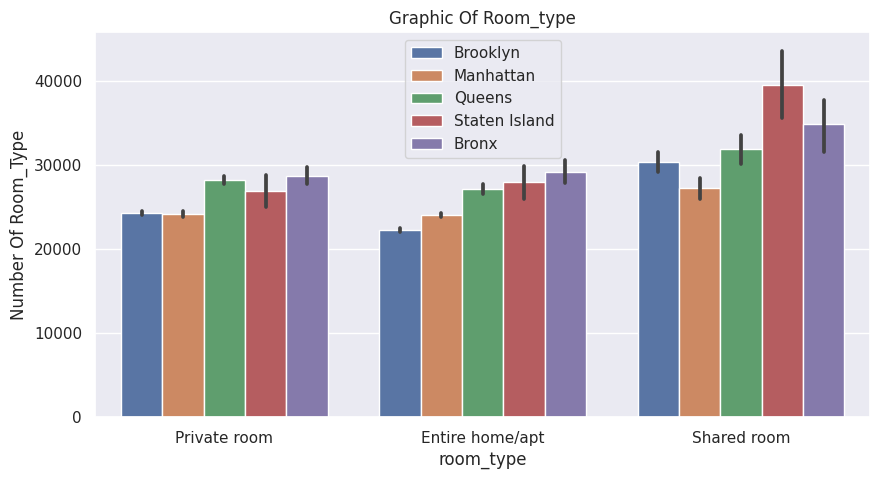

In [509]:
sns.set(rc={"figure.figsize":(10,5)}) #plt.figure(figsize=(5,5))

sns.barplot(df_airbnb,x=df_airbnb['room_type'],y=df_airbnb.index,hue="neighbourhood_group").set_title("Graphic Of Room_type")
plt.ylabel("Number Of Room_Type")
plt.legend(loc='upper center')

In [510]:
df_airbnb["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<ipython-input-511-2ea8aacba9ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airbnb.groupby('neighbourhood_group').sum().plot.pie(y='price',autopct="%.2f%%",legend=False,figsize=(5,5),ylabel="",explode=(0.6,0


Text(0.5, 1.0, 'Graphic Of Neighbourhood_group')

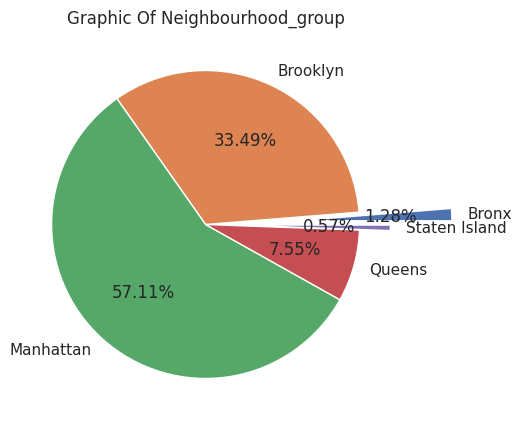

In [511]:
df_airbnb.groupby('neighbourhood_group').sum().plot.pie(y='price',autopct="%.2f%%",legend=False,figsize=(5,5),ylabel="",explode=(0.6,0
                                                                                  ,0,0,0.2)).set_title("Graphic Of Neighbourhood_group")

Text(0.5, 1.0, 'Prices Of Neighbourhood')

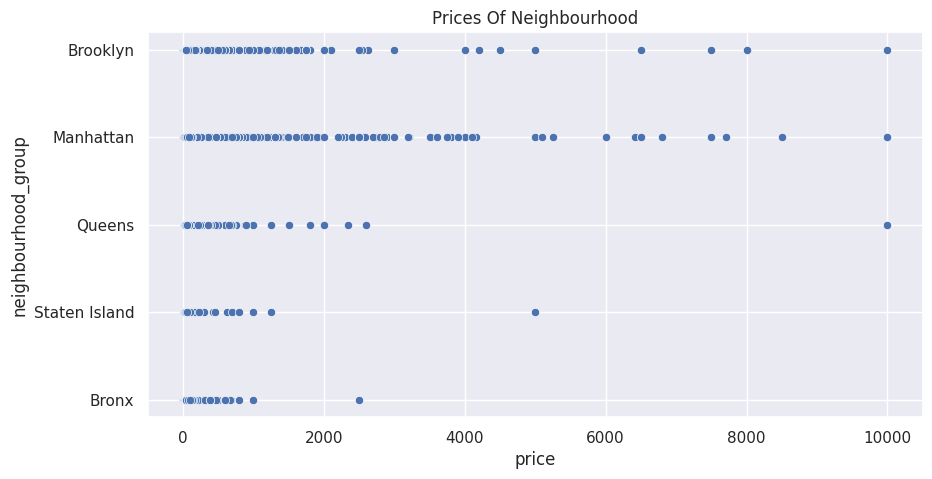

In [512]:
sns.scatterplot(data=df_airbnb,y='neighbourhood_group',x="price")
plt.title('Prices Of Neighbourhood')

In [513]:
df_airbnb[df_airbnb["price"]==10000]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude longitude  \
9151   Kathrine              Queens          Astoria   40.7681 -73.91651   
17692      Erin            Brooklyn       Greenpoint   40.7326 -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213 -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0           0   

      reviews_per_month  calculated_host_listings_count  availability_365  
9151               0.04                               1                 0  
17692              0.16                               1                 0  
29238                 0                               1                83

In [514]:
df_airbnb[df_airbnb["price"]<=2000].sort_values(ascending=False,by="price").shape


(48809, 16)

In [515]:
df_airbnb.shape

(48895, 16)

In [516]:
df_airbnb[df_airbnb["price"]>2000].sort_values(ascending=False,by="price").shape

(86, 16)

<Figure size 2000x1000 with 0 Axes>

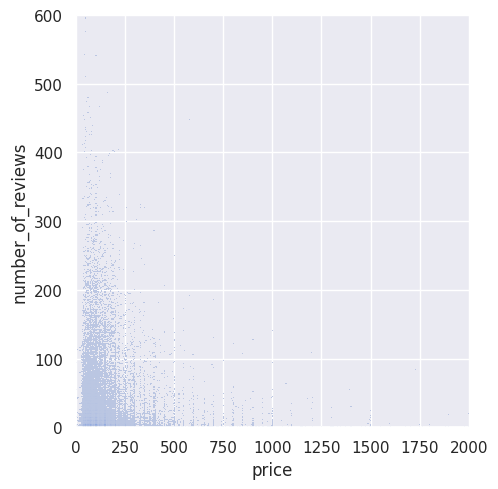

In [517]:
plt.figure(dpi=200)
sns.displot(df_airbnb,y="number_of_reviews",x="price")
plt.axis([0,2000,0,600])
plt.savefig("Graphic.png",dpi=200)

In [518]:
df_airbnb.corr()

<ipython-input-518-b06a9faeca30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_airbnb.corr()


price  minimum_nights  number_of_reviews  \
price                           1.000000        0.042799          -0.047954   
minimum_nights                  0.042799        1.000000          -0.080116   
number_of_reviews              -0.047954       -0.080116           1.000000   
calculated_host_listings_count  0.057472        0.127960          -0.072376   
availability_365                0.081829        0.144303           0.172028   

                                calculated_host_listings_count  \
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

(0.0, 2000.0, 0.0, 3000.0)

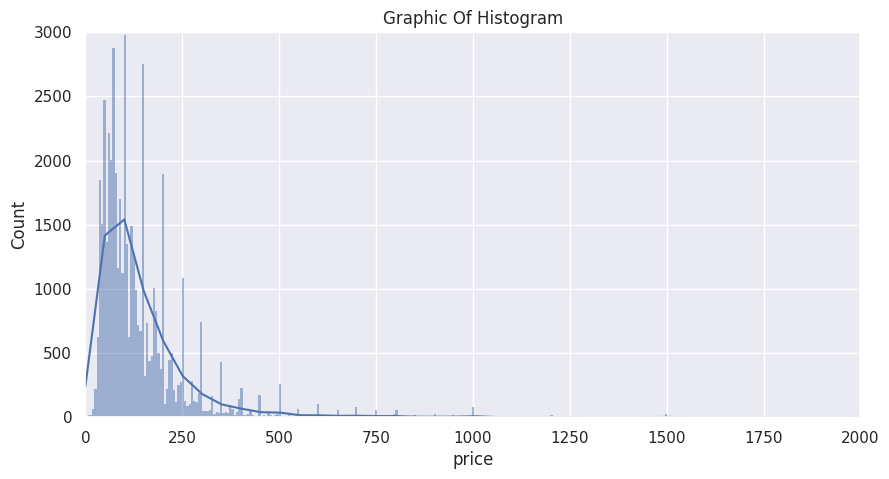

In [519]:
sns.histplot(df_airbnb,x="price",kde=True)
plt.title("Graphic Of Histogram")
plt.axis([0,2000,0,3000])

<Axes: xlabel='price', ylabel='Density'>

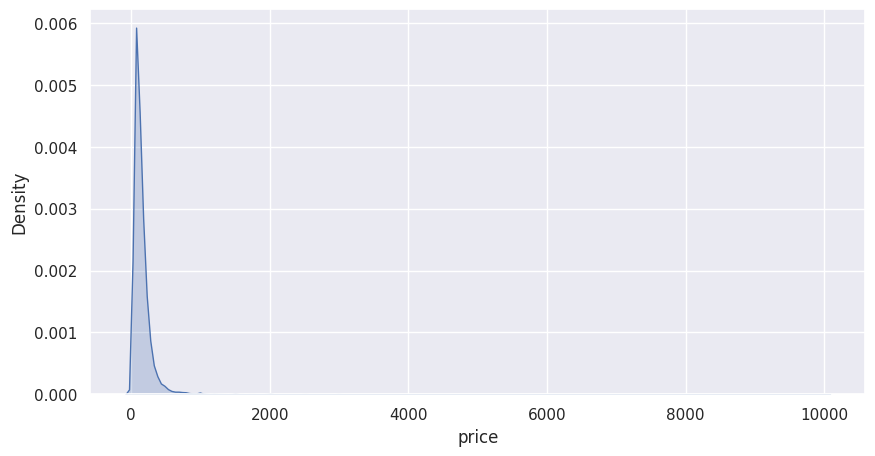

In [520]:
sns.kdeplot(df_airbnb,x="price",fill=True)

<ipython-input-521-be1f97fcdc38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_airbnb.corr(),annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'price'),
  Text(1.5, 0, 'minimum_nights'),
  Text(2.5, 0, 'number_of_reviews'),
  Text(3.5, 0, 'calculated_host_listings_count'),
  Text(4.5, 0, 'availability_365')])

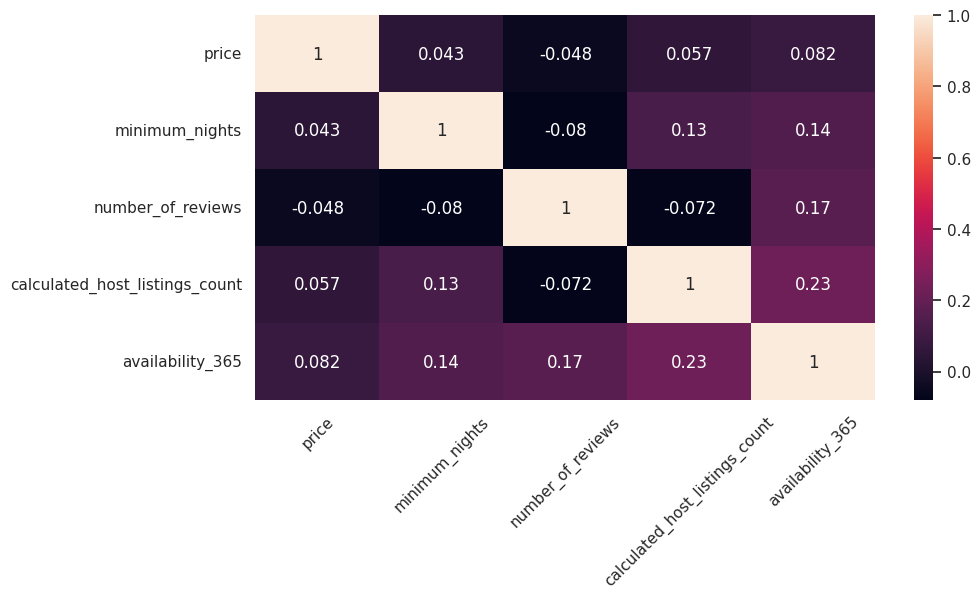

In [521]:
sns.heatmap(df_airbnb.corr(),annot=True)
plt.xticks(rotation=45)


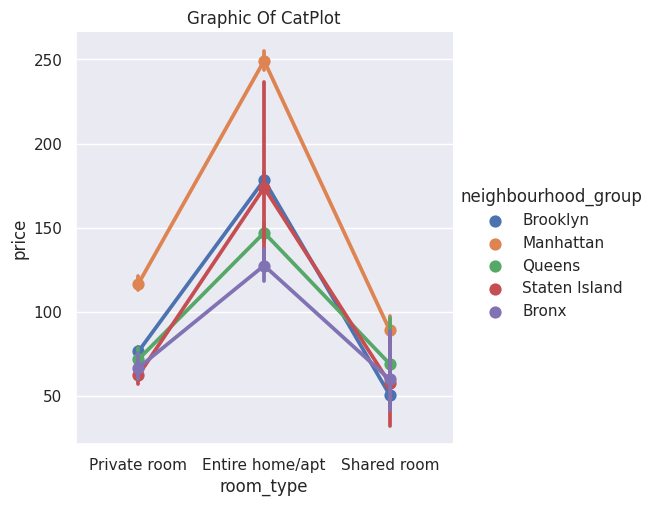

In [522]:
sns.catplot(df_airbnb,x='room_type',y='price',hue="neighbourhood_group",kind='point')
plt.title("Graphic Of CatPlot")
plt.show()

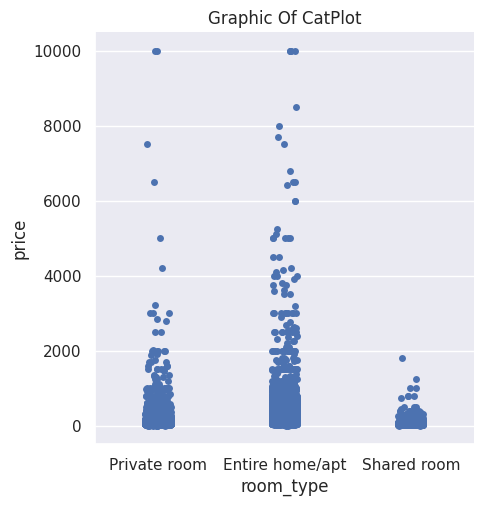

In [523]:
sns.catplot(df_airbnb,x='room_type',y='price',kind='strip')
plt.title("Graphic Of CatPlot")
plt.show()

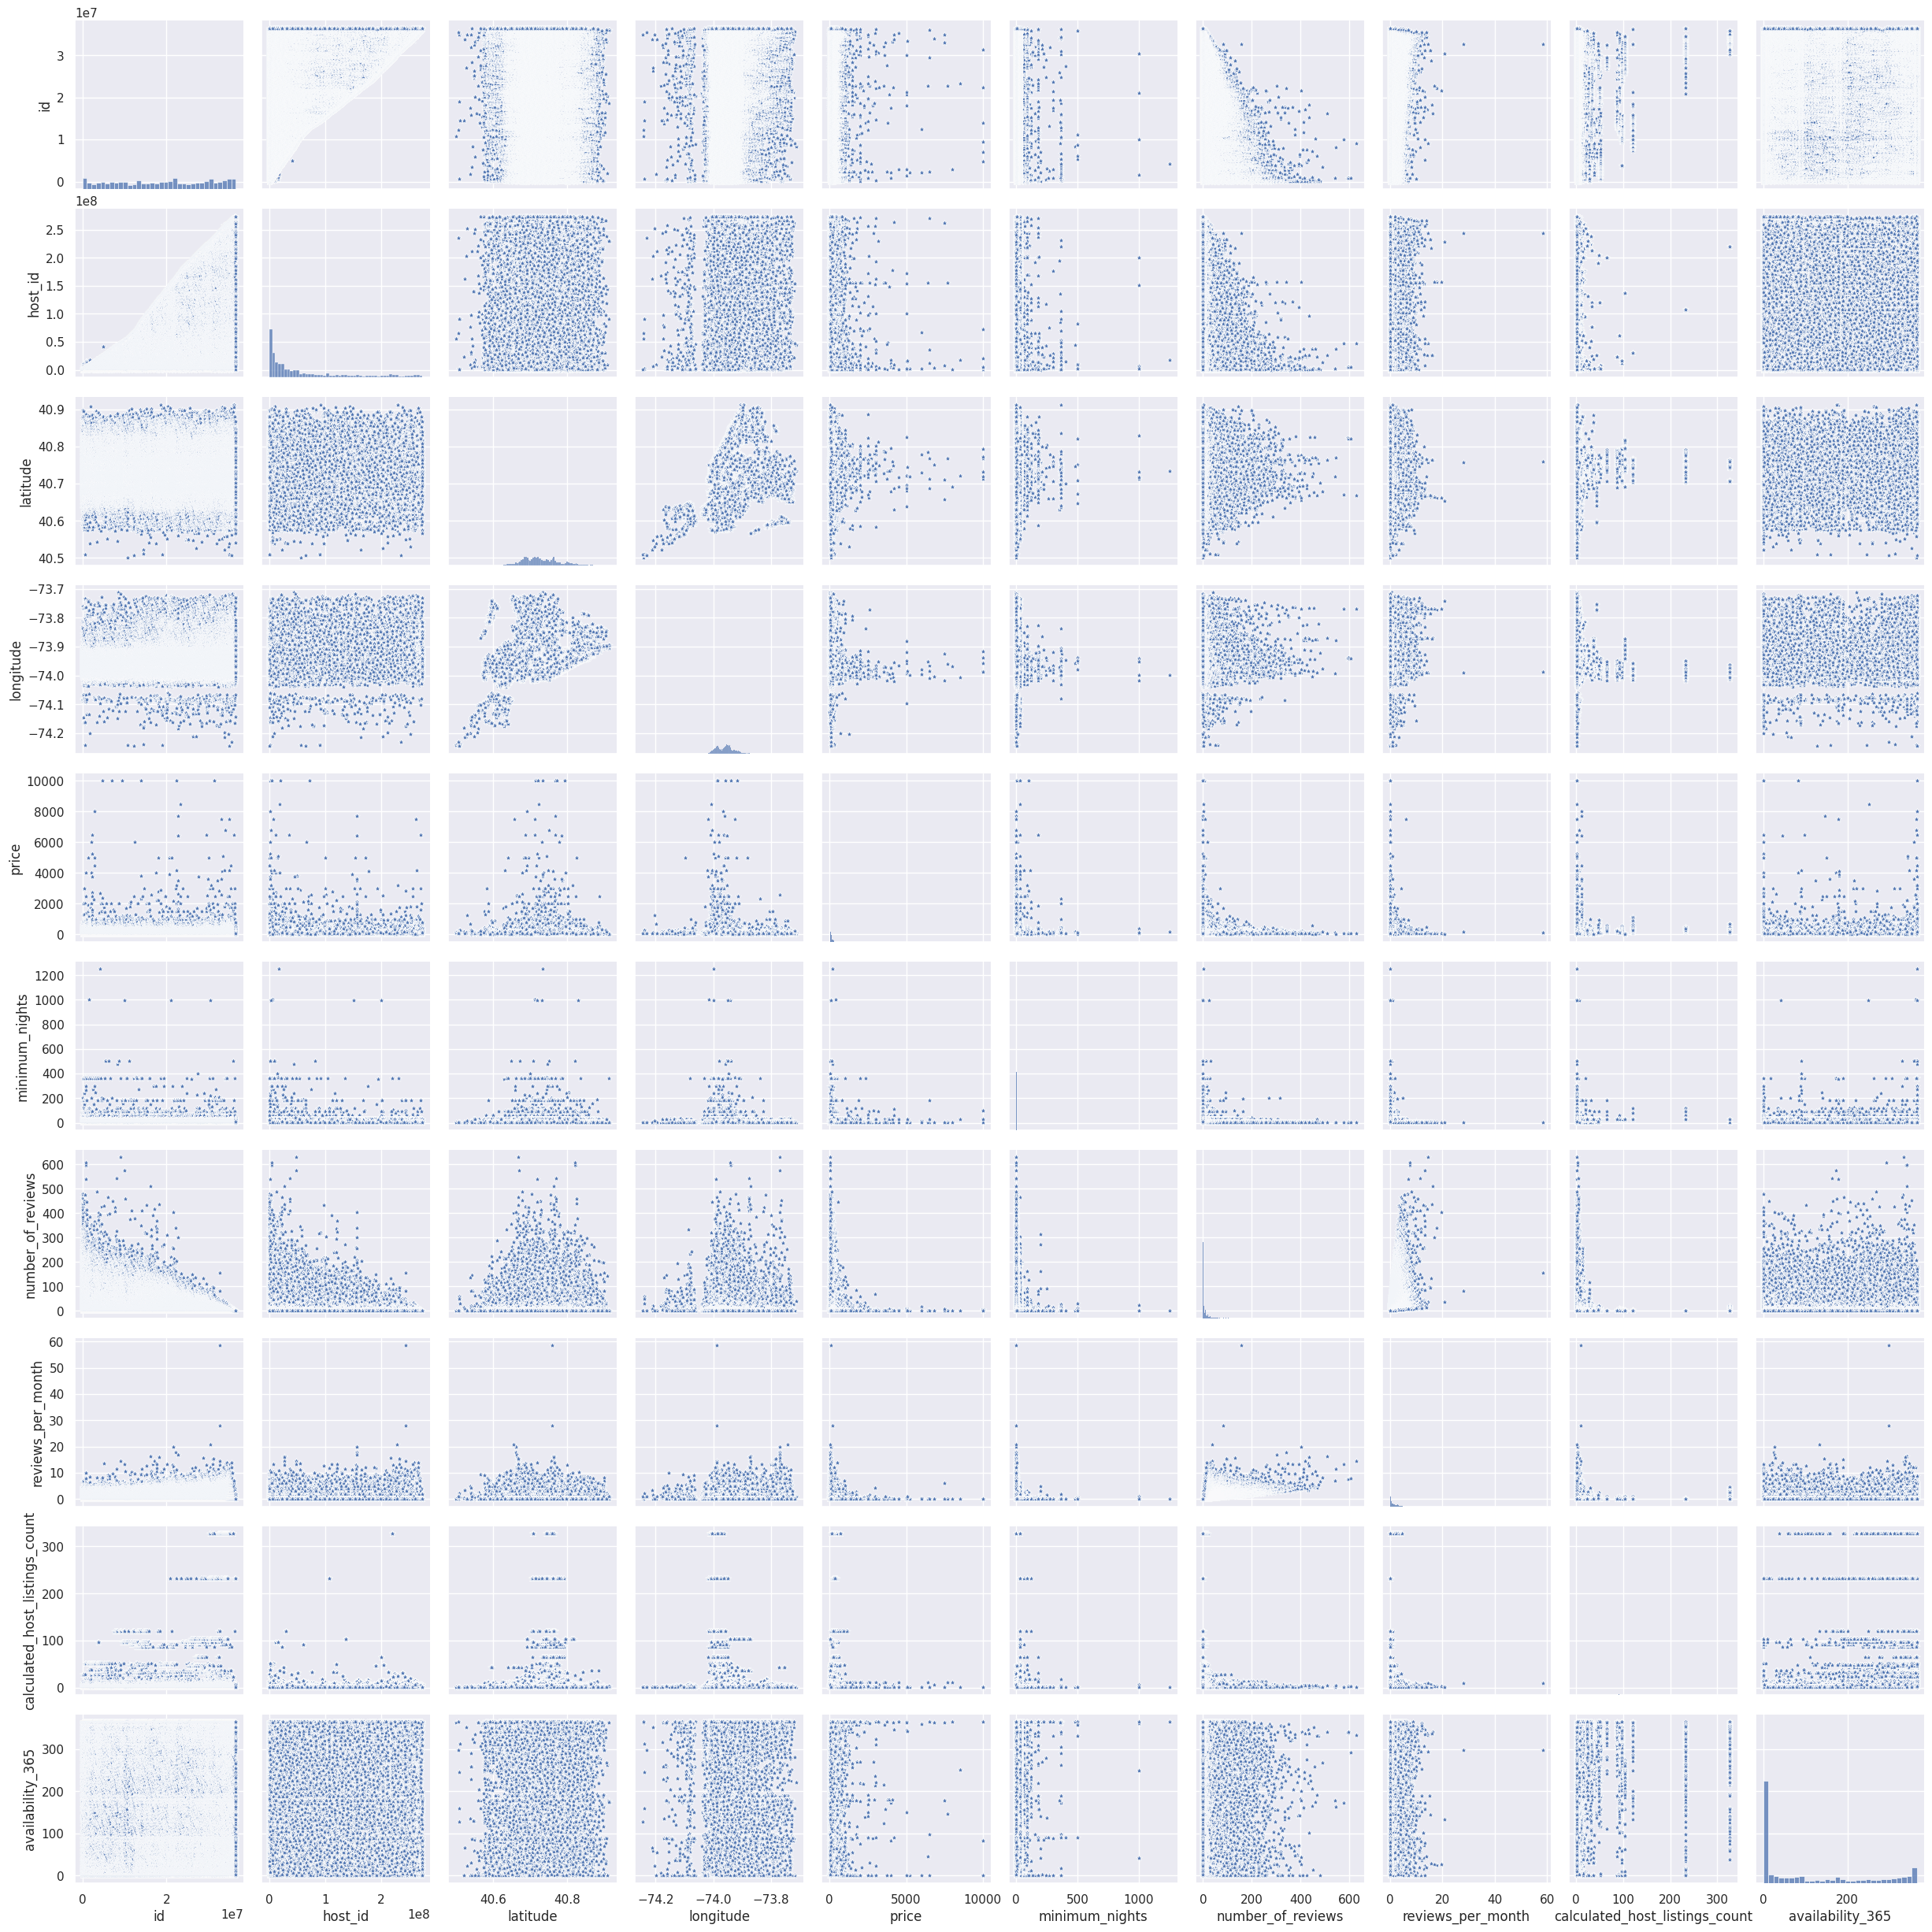

In [524]:
sns.pairplot(data=df_airbnb,markers='*')


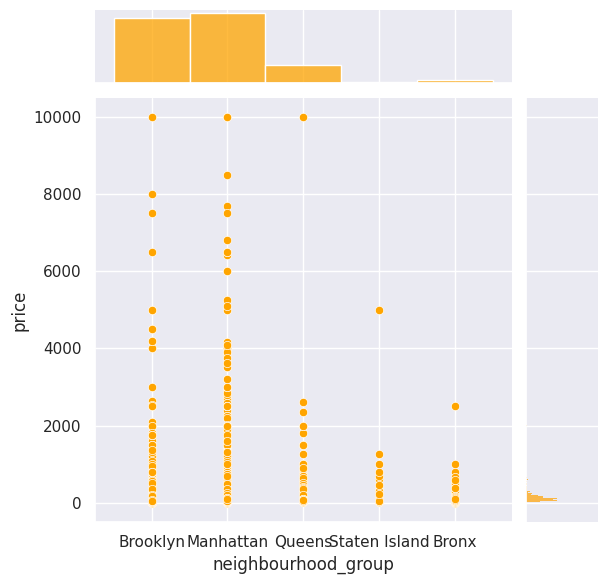

In [525]:
sns.jointplot(df_airbnb,x="neighbourhood_group",y="price",color="orange")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

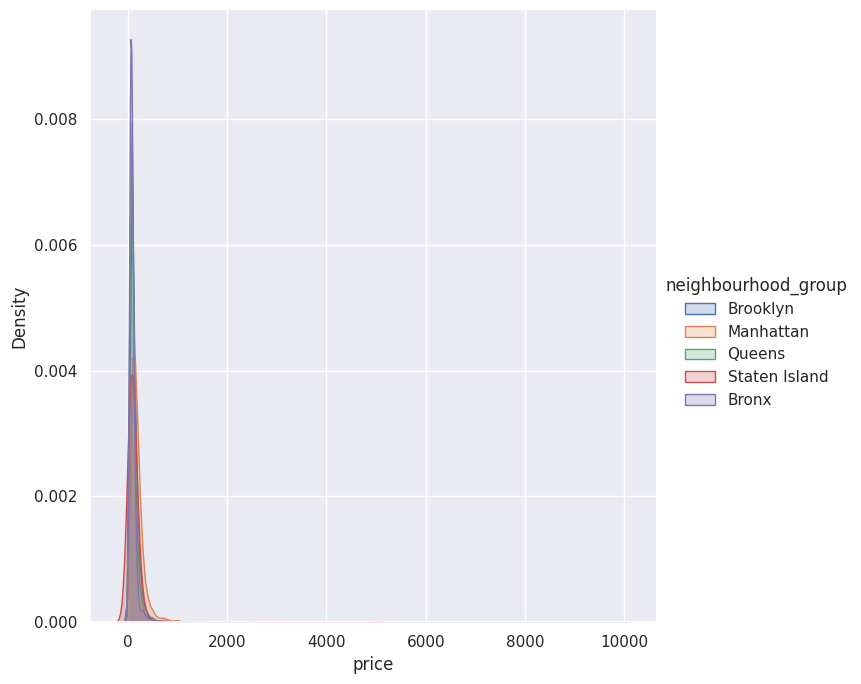

In [526]:
sns.FacetGrid(df_airbnb,hue="neighbourhood_group",height=7).map(sns.kdeplot,"price", shade=True).add_legend()
sns.set(rc={'figure.figsize':(10,10)})

Text(0, 0.5, 'Neighbourhood Group')

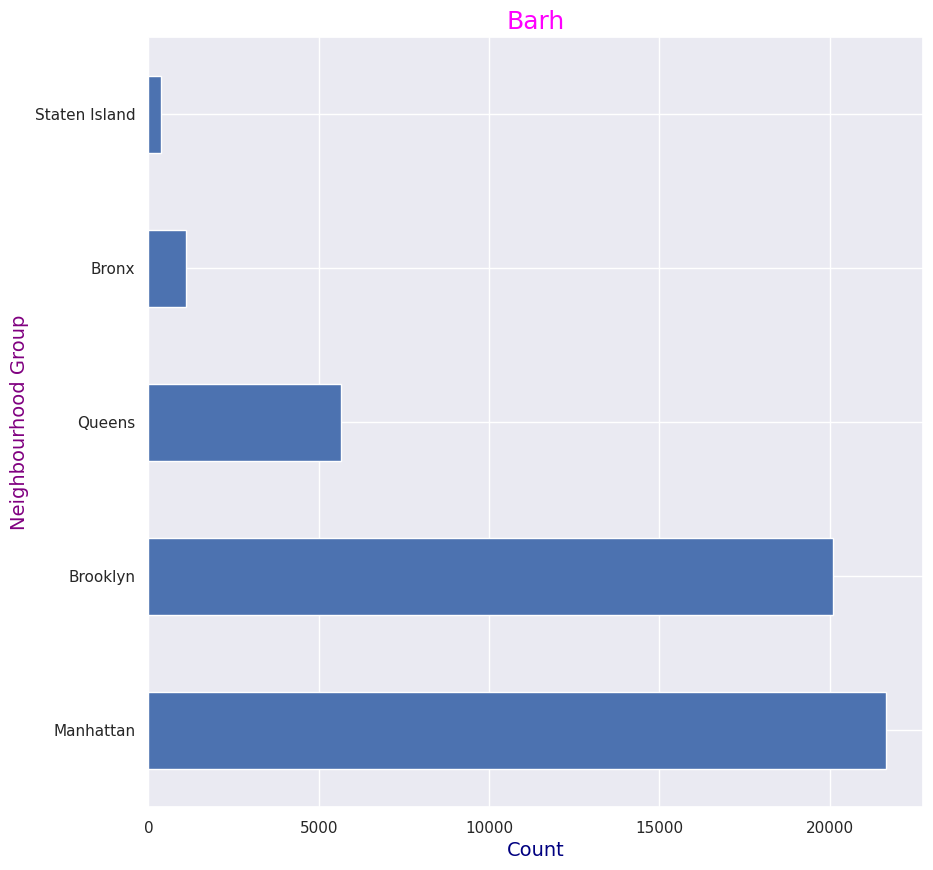

In [527]:
df_airbnb['neighbourhood_group'].value_counts().plot.barh()
plt.title("Barh",fontdict={'fontsize':18,'fontweight':1,'color':'Magenta'})
plt.xlabel("Count",fontdict={'color':'navy','fontsize':14})
plt.ylabel("Neighbourhood Group",fontdict={'color':'Purple','fontsize':14})

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Staten Island')])

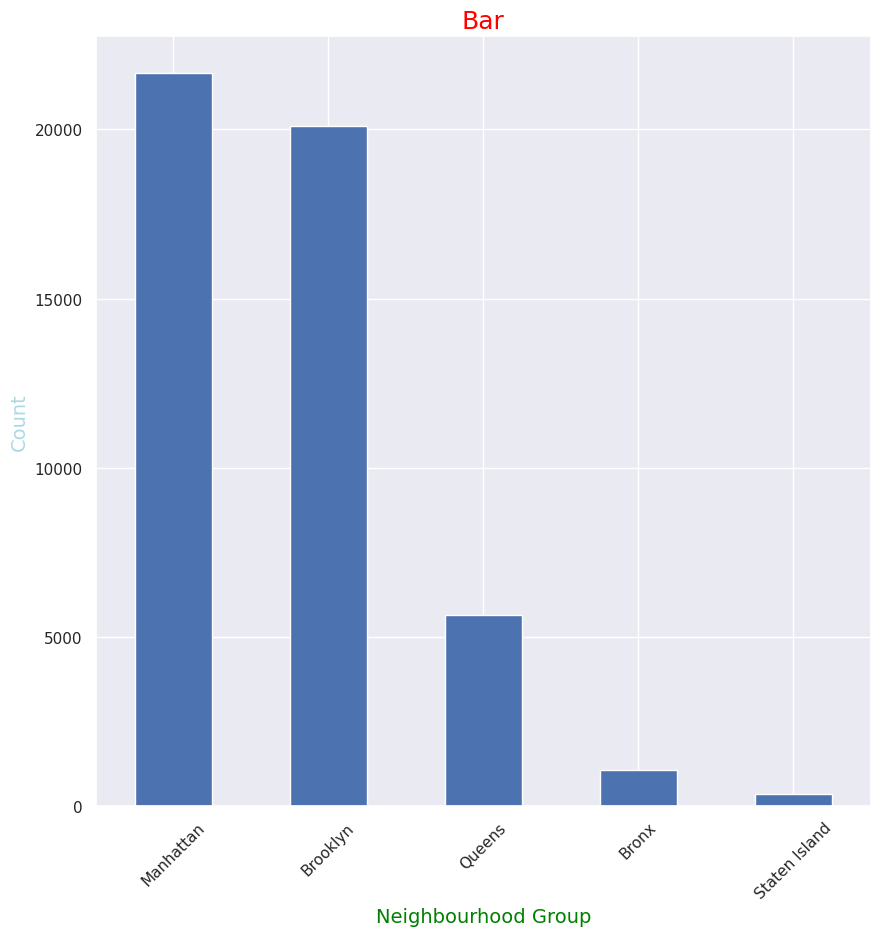

In [528]:
df_airbnb['neighbourhood_group'].value_counts().plot.bar()
plt.title("Bar",fontdict={'color':'red','fontsize':18})
plt.ylabel("Count",fontdict={'color':'Lightblue','fontsize':14})
plt.xlabel("Neighbourhood Group",fontdict={'color':'Green','fontsize':14})
plt.xticks(rotation=45)

In [529]:
df_airbnb=df_airbnb.set_index('id')
with pd.ExcelWriter("/content/drive/MyDrive/AB_NYC_2019.xlsx",engine="openpyxl",mode="w") as file:
   df_airbnb.to_excel(file,sheet_name="AirBnb")

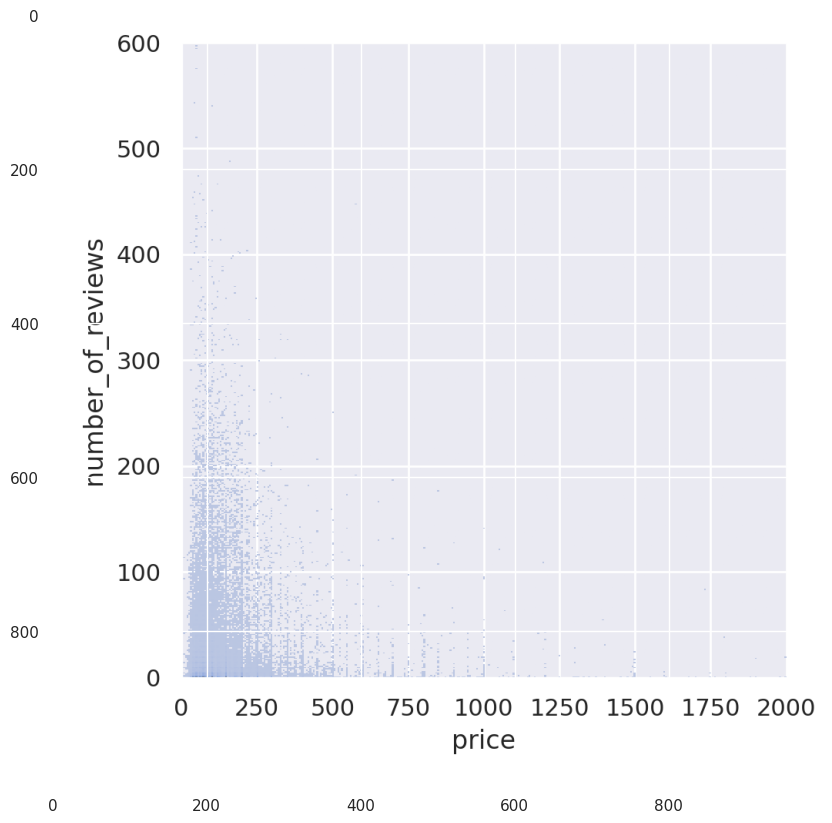

In [530]:
graph=plt.imread('Graphic.png')
plt.imshow(graph)